# BERTopic

This can all be easily done via [BERTopic](https://maartengr.github.io/BERTopic/algorithm/algorithm.html)

In [1]:
import numpy as np
import pandas as pd
from bertopic import BERTopic

/opt/homebrew/Caskroom/miniforge/base/envs/webtopics/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data

In [2]:
data = pd.read_parquet('../data/marketing_sample_walmart.parq.gzip')

In [3]:
data.head()

Uniq Id            Crawl Timestamp  \
0  51b010b871cde349bd32159a1cc1a15f  2020-01-24 16:08:36 +0000   
1  d6a7f100e44a626a3701804e99236ad6  2020-01-24 15:54:21 +0000   
2  99d2b7da7e3e427a942f864937dacd9d  2020-01-24 18:34:28 +0000   
3  4c76d170c2c6a759cbce812d790a0b88  2020-01-24 11:08:53 +0000   
4  8ac95837dc8baa01e504fd8f633ffaf2  2020-03-10 07:37:21 +0000   

                                         Product Url  \
0  https://www.walmart.com/ip/Allegiance-Economy-...   
1  https://www.walmart.com/ip/Kenneth-Cole-Reacti...   
2  https://www.walmart.com/ip/Kid-Tough-Fitness-I...   
3  https://www.walmart.com/ip/THE-FIRST-YEARS/167...   
4  https://www.walmart.com/ip/4-Pack-MD-USA-Seaml...   

                                        Product Name  \
0  Allegiance Economy Dual-scale Digital Thermometer   
1  Kenneth Cole Reaction Eau De Parfum Spray For ...   
2  Kid Tough Fitness Inflatable Free-Standing Pun...   
3                                    THE FIRST YEARS   
4  4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...   

                                         Description  List Price  Sale Price  \
0   We aim to show you accurate product informati...       11.11       11.11   
1   We aim to show you accurate product informati...       23.99       23.99   
2   We aim to show you accurate product informati...       30.76       30.76   
3   We aim to show you accurate product informati...        6.99        6.99   
4  We aim to show you accurate product informatio...       28.27       28.27   

             Brand  Item Number          Gtin  Package Size  \
0  Cardinal Health          NaN  707389636164           NaN   
1     Kenneth Cole          NaN  191565696101           NaN   
2         BONK FIT  563852139.0  855523007070           NaN   
3  The First Years  553299941.0   71463046263           NaN   
4           MD USA          NaN  191897514500           NaN   

                                            Category  Postal Code  Available  
0  Health | Medicine Cabinet | Thermometers | Dig...          NaN       True  
1  Premium Beauty | Premium Fragrance | Premium P...          NaN       True  
2  Sports & Outdoors | Outdoor Sports | Hunting |...          NaN       True  
3                      Baby | Diapering | Baby Wipes          NaN       True  
4            Health | Diabetes Care | Diabetic Socks          NaN       True

In [4]:
data.shape

(30000, 14)

Many of these URLs are invalid (two years old), so I'm going to treat the `Product Name` as the title that would've been retrieved from URL HTML.  Otherwise, we would fetch the titles and/or actual HTML content.

In [5]:
products = data['Product Name'].to_list()

In [6]:
products[:10]

['Allegiance Economy Dual-scale Digital Thermometer',
 'Kenneth Cole Reaction Eau De Parfum Spray For Women 3.40 Oz',
 'Kid Tough Fitness Inflatable Free-Standing Punching Bag + Machine Washable Fabric Cover South Carolina Gamecocks Kids Workout Buddy by Bonk Fit',
 'THE FIRST YEARS',
 '4 Pack - MD USA Seamless Toe-Wave-In Mesh Diabetic Crew Socks, Black, Medium, 1 Pair',
 'Gerber 2nd Foods Apple Baby Food 4 oz. Tubs 2 Count',
 'Kushies Ultra-Lite All-In-One Form-Fitted Washable Cloth Diapers (Blue Whales, Infant)',
 'sunmark Stop Smoking Aid 14 mg Strength Transdermal Patch, 70677003101 - Box of 14',
 'Berkley PowerBait Glitter Chroma-Glow Dough Fishing Bait',
 'Mikasa Rubber Basketball, Intermediate, 28.5']

# Fit Model

In [22]:
model = BERTopic(
    top_n_words=5,
    n_gram_range=(1,3),
    nr_topics='auto'
)
topics, probs = model.fit_transform(products)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabli

In [23]:
model.get_topic_info()

Topic  Count                                               Name
0       -1   7211                                  -1_oz_pack_of_and
1        0    712                        0_light_bulb_light bulb_led
2        1    548                          1_bag_bags_diaper_blanket
3        2    501                         2_gloves_glove_bat_batting
4        3    498                 3_coffee_lotion_ground coffee_body
..     ...    ...                                                ...
384    383     11           383_giardiniera_relish_hot_orlando greco
385    384     11  384_alcoholfree_extract_tincture superconcentr...
386    385     11          385_denture_false_false teeth_storage box
387    386     11              386_tank_paintball_paintball tank_hpa
388    387     10               387_st pierre_pierre_halex_bocce set

[389 rows x 3 columns]

In [24]:
model.get_document_info(products)

Document  Topic  \
0      Allegiance Economy Dual-scale Digital Thermometer    116   
1      Kenneth Cole Reaction Eau De Parfum Spray For ...     78   
2      Kid Tough Fitness Inflatable Free-Standing Pun...     -1   
3                                        THE FIRST YEARS    129   
4      4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...    217   
...                                                  ...    ...   
29995                    Inside Groin Cup with Supporter     -1   
29996            Tone Brothers Dromedary Pimientos, 2 oz     -1   
29997  Brittanies Thyme 242091 16 oz Organic Olive Oi...     20   
29998  30-Foot Round Boulder Swirl Unibead Above Grou...      5   
29999                         Realtree Mens Jacket Parka     74   

                                                    Name  \
0      116_thermometer_digital_digital thermometer_te...   
1                           78_eau de_eau_de_de toilette   
2                                      -1_oz_pack_of_and   
3                             129_bib_baby bib_bibs_baby   
4                  217_diabetic_socks_crew_diabetic crew   
...                                                  ...   
29995                                  -1_oz_pack_of_and   
29996                                  -1_oz_pack_of_and   
29997            20_soap_hand soap_hand_liquid hand soap   
29998                 5_pool_swimming_swimming pool_pump   
29999                  74_jacket_eddie bauer_eddie_bauer   

                                             Top_n_words  Probability  \
0      thermometer - digital - digital thermometer - ...     1.000000   
1             eau de - eau - de - de toilette - toilette     0.638231   
2                         oz - pack - of - and - pack of     0.000000   
3                 bib - baby bib - bibs - baby - bandana     0.158400   
4      diabetic - socks - crew - diabetic crew - diab...     1.000000   
...                                                  ...          ...   
29995                     oz - pack - of - and - pack of     0.000000   
29996                     oz - pack - of - and - pack of     0.000000   
29997  soap - hand soap - hand - liquid hand soap - l...     0.798843   
29998       pool - swimming - swimming pool - pump - cue     0.766501   
29999      jacket - eddie bauer - eddie - bauer - womens     1.000000   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
29995                    False  
29996                    False  
29997                    False  
29998                    False  
29999                    False  

[30000 rows x 6 columns]

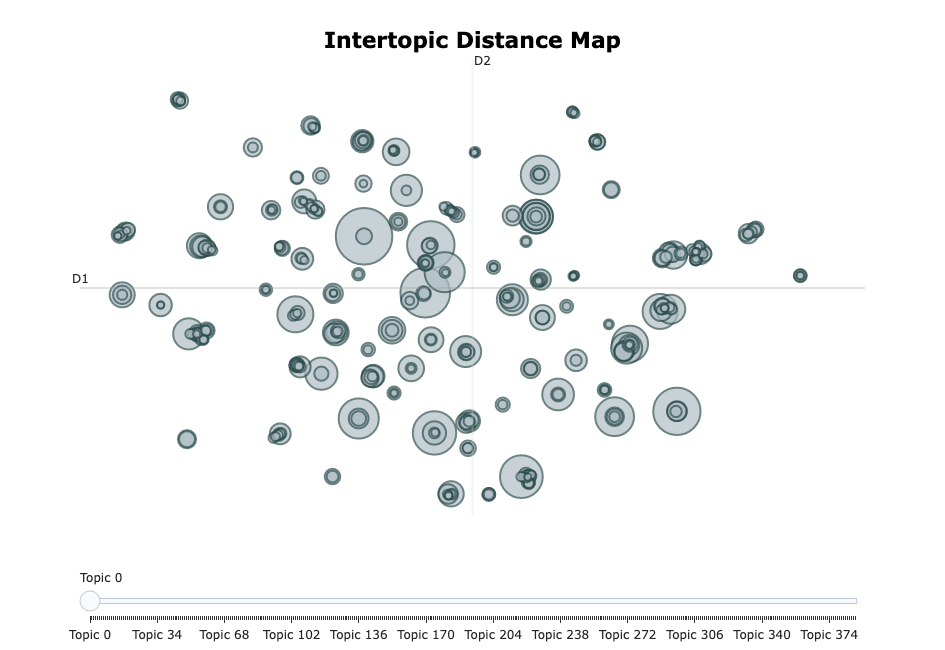

In [25]:
model.visualize_topics()

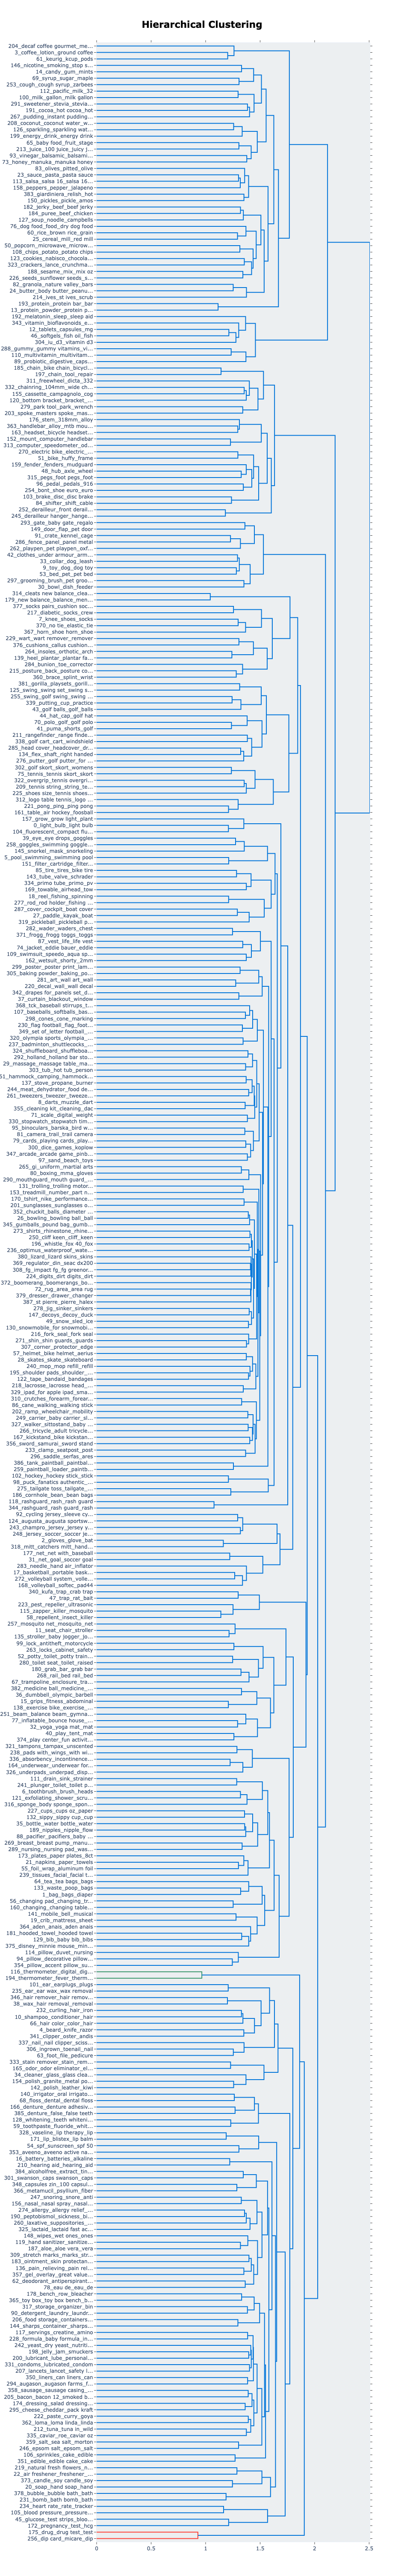

In [26]:
model.visualize_hierarchy()

In [27]:
model.get_representative_docs()

{116: ['entrust Performance Digital Thermometers',
  'Taylor 503 Connoisseur Oven Thermometer',
  'Prestige Medical Digital Thermometer'],
 78: ['Hugo Boss In Motion Eau De Toilette Spray, Cologne for Men, 3 Oz',
  'Emson Laurant Personal Pedi',
  'Versace Eros Eau De Toilette Spray, Cologne for Men, 3.4 Oz'],
 129: ['10-Pack Cute Cartoon Unisex Gift Set Baby Bibs Bandana Drool Bibs for Drooling and Teething Boys Girls Toddlers',
  'My First Fourth of July- eagle Baby Bib',
  'Colorful Bandana Baby Bibs for Girls, Stylish Adjustable Bib for Drooler Baby & Toddler 3-Pack'],
 217: ['Diabetic Crew Socks 2 Pair',
  'White Diabetic Socks - Pack of 12 Pairs Size 10-13',
  '12 Pair Diabetic Ankle Circulatory Socks Health Support Mens Fit White Size 9-11'],
 65: ['(6 Pouches) Earths Best Organic Stage 2 Baby Food, Banana Blueberry Breakfast, 4 oz. Pouch',
  'Gerber Organic Peach, Apricot & Carrot with Yogurt Toddler Food Pouch, 3.5 Oz.',
  'Earths Best Organic Stage 1 Chicken & Chicken Broth B

In [28]:
model.get_topic(78)

[('eau de', 0.0817875989011483),
 ('eau', 0.08064102325683045),
 ('de', 0.06763114941013758),
 ('de toilette', 0.05123905475442711),
 ('toilette', 0.05123905475442711)]

In [29]:
model.get_topic(341)

[('clipper', 0.0941344975109251),
 ('oster', 0.08272514366231519),
 ('andis', 0.04549552658417062),
 ('blade', 0.04091116552980544),
 ('wahl', 0.040841213431514985)]

In [30]:
model.hierarchical_topics(products)

100%|███████████████████████████████████████████████████████████████████████████████████████| 387/387 [00:02<00:00, 148.98it/s]


Parent_ID                                        Parent_Name  \
386       774                               for_pack_with_oz_and   
385       773                            for_with_and_bike_black   
384       772                              for_with_and_baby_dog   
383       771                          oz_coffee_pack_of_pack of   
382       770                            for_with_baby_and_light   
..        ...                                                ...   
4         392           protein_powder_whey_protein powder_shake   
3         391             rashguard_rash guard_rash_guard_sleeve   
2         390  new balance_balance_new balance mens_balance m...   
1         389        thermometer_digital_infrared_fever_forehead   
0         388                   drug_drug test_test_dip_dip card   

                                                Topics Child_Left_ID  \
386  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           771   
385  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 18...           772   
384  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 17, 18, 19...           770   
383  [3, 12, 13, 14, 16, 23, 24, 25, 46, 50, 54, 60...           761   
382  [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 17, 18, 19, 2...           769   
..                                                 ...           ...   
4                                            [13, 193]           193   
3                                           [118, 344]           118   
2                                           [179, 314]           314   
1                                           [116, 194]           194   
0                                           [175, 256]           175   

                                       Child_Left_Name Child_Right_ID  \
386                          oz_coffee_pack_of_pack of            773   
385                              for_with_and_baby_dog            752   
384                            for_with_baby_and_light            697   
383                          oz_coffee_pack_of_pack of            653   
382                 hair_brush_toothbrush_soap_remover            768   
..                                                 ...            ...   
4     protein_protein bar_bar_protein 12_protein 12 ct             13   
3         rashguard_rash_rash guard_sleeve_long sleeve            344   
2    cleats new balance_cleats new_baseball cleats ...            179   
1    thermometer_fever_thermometer for_forehead_inf...            116   
0                        drug_drug test_test_dip_panel            256   

                                      Child_Right_Name  Distance  
386                            for_with_and_bike_black  1.566898  
385                      bike_bicycle_tire_shimano_hub  1.424206  
384                         dog_pet_toy_collar_dog toy  1.355589  
383               tablets_capsules_mg_softgels_vitamin  1.344042  
382                           baby_light_golf_with_for  1.321695  
..                                                 ...       ...  
4             protein_powder_protein powder_whey_shake  0.771803  
3            rashguard_rash guard_rash_boys_swim shirt  0.753842  
2    new balance_balance_mens shoes_new_baseball cl...  0.732737  
1    thermometer_digital_digital thermometer_temper...  0.679650  
0    dip card_micare_dip_instant urine_instant urin...  0.653444  

[387 rows x 8 columns]

In [31]:
model.reduce_topics(products, nr_topics=100)

In [34]:
model.topic_labels_

{-1: '-1_oz_pack_of_for',
 0: '0_light_bulb_led_light bulb',
 1: '1_bag_bags_baby_diaper',
 2: '2_tablets_capsules_mg_supplement',
 3: '3_gloves_glove_bat_baseball',
 4: '4_coffee_lotion_oz_body',
 5: '5_shoes_knee_socks_shoe',
 6: '6_pool_swimming_pump_swimming pool',
 7: '7_beard_razor_knife_shave',
 8: '8_toy_dog_toys_dog toy',
 9: '9_shampoo_hair_color_conditioner',
 10: '10_belt_treadmill_fitness_exercise',
 11: '11_stroller_seat_chair_baby',
 12: '12_protein_powder_vanilla_whey',
 13: '13_toothbrush_brush_heads_electric toothbrush',
 14: '14_darts_muzzle_dart_rifle',
 15: '15_vest_jacket_lacrosse_clothes',
 16: '16_test_blood_test strips_strips',
 17: '17_candy_gum_mints_nicotine',
 18: '18_net_goal_sports_volleyball',
 19: '19_battery_batteries_alkaline_lithium',
 20: '20_brake_lock_derailleur_shifter',
 21: '21_paper_napkins_tissue_2ply',
 22: '22_crib_mattress_sheet_fitted',
 23: '23_sauce_pasta_olives_pasta sauce',
 24: '24_basketball_first team_portable basketball_team',
 25

In [36]:
model.get_document_info(products)

Document  Topic  \
0      Allegiance Economy Dual-scale Digital Thermometer     41   
1      Kenneth Cole Reaction Eau De Parfum Spray For ...     -1   
2      Kid Tough Fitness Inflatable Free-Standing Pun...     -1   
3                                        THE FIRST YEARS      1   
4      4 Pack - MD USA Seamless Toe-Wave-In Mesh Diab...      5   
...                                                  ...    ...   
29995                    Inside Groin Cup with Supporter     -1   
29996            Tone Brothers Dromedary Pimientos, 2 oz     -1   
29997  Brittanies Thyme 242091 16 oz Organic Olive Oi...     28   
29998  30-Foot Round Boulder Swirl Unibead Above Grou...      6   
29999                         Realtree Mens Jacket Parka     15   

                                        Name  \
0      41_scale_thermometer_digital_infrared   
1                          -1_oz_pack_of_for   
2                          -1_oz_pack_of_for   
3                     1_bag_bags_baby_diaper   
4                    5_shoes_knee_socks_shoe   
...                                      ...   
29995                      -1_oz_pack_of_for   
29996                      -1_oz_pack_of_for   
29997          28_soap_hand soap_hand_meyers   
29998     6_pool_swimming_pump_swimming pool   
29999        15_vest_jacket_lacrosse_clothes   

                                            Top_n_words  Probability  \
0      scale - thermometer - digital - infrared - fever     1.000000   
1                            oz - pack - of - for - and     0.638231   
2                            oz - pack - of - for - and     0.000000   
3                  bag - bags - baby - diaper - blanket     0.158400   
4                    shoes - knee - socks - shoe - mens     1.000000   
...                                                 ...          ...   
29995                        oz - pack - of - for - and     0.000000   
29996                        oz - pack - of - for - and     0.000000   
29997     soap - hand soap - hand - meyers - mrs meyers     0.798843   
29998   pool - swimming - pump - swimming pool - filter     0.766501   
29999          vest - jacket - lacrosse - clothes - dog     1.000000   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
29995                    False  
29996                    False  
29997                    False  
29998                    False  
29999                    False  

[30000 rows x 6 columns]

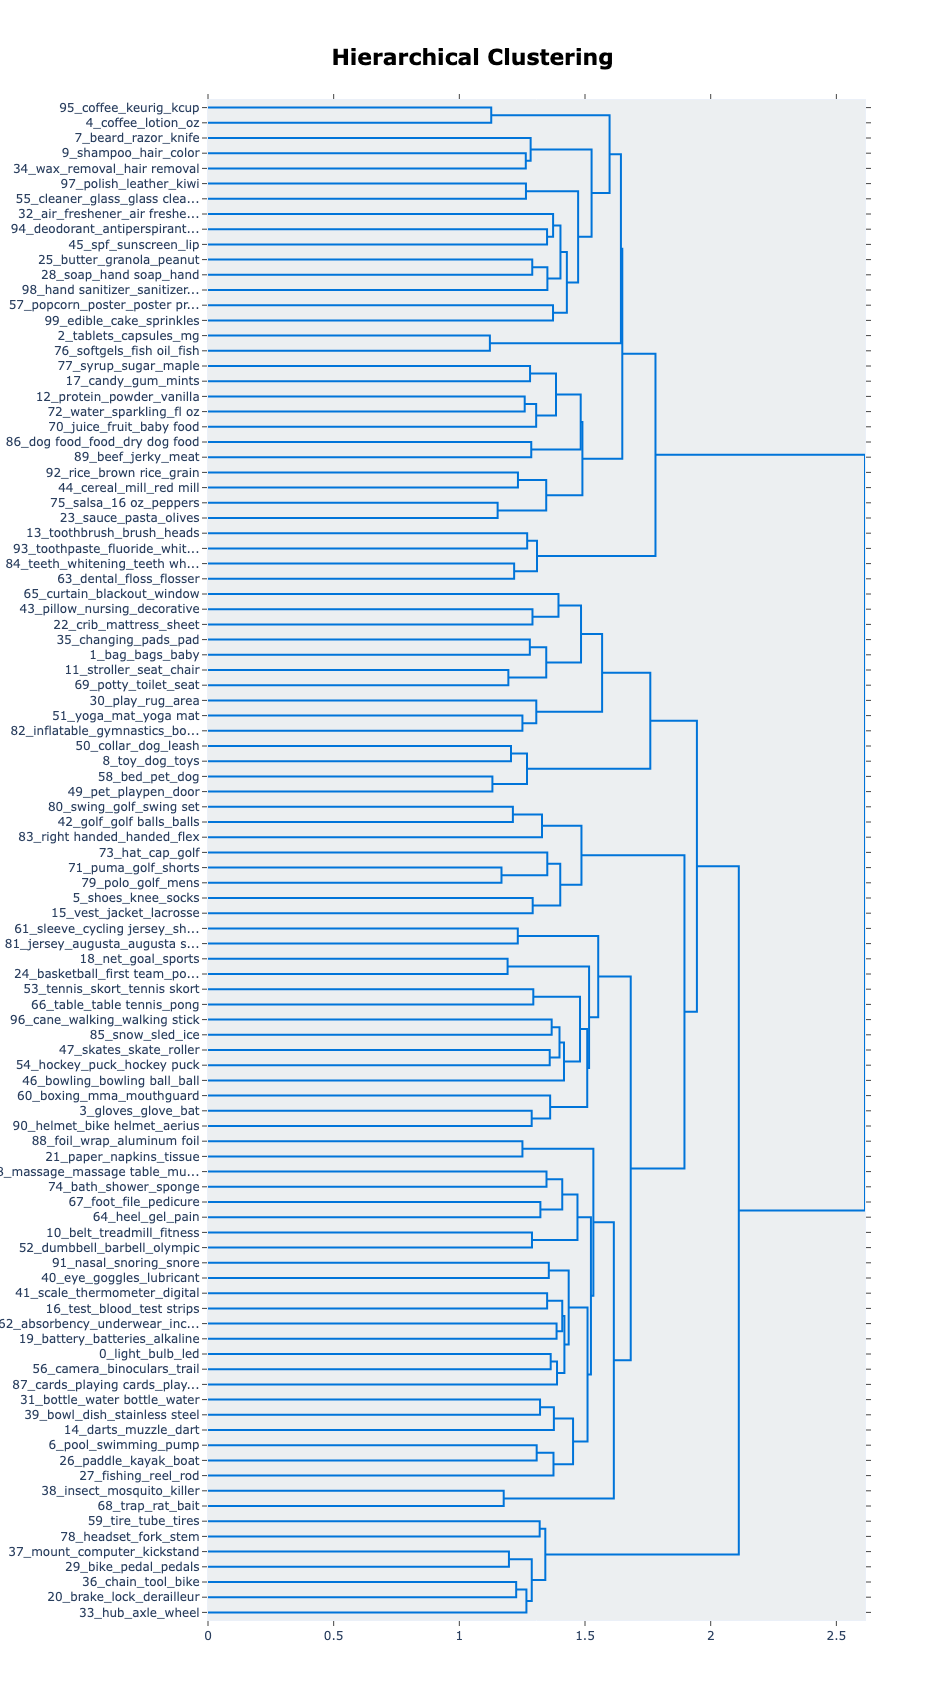

In [38]:
model.visualize_hierarchy()